---
# Dropout as Bayesian Gaussian Process (GP) Approximation

### Schwartz combined and revised five sources/developments May 8 (2022)

- Haining Tan Sep 10 (2021) + Schwartz Sep 15 (MADE.ipynb + MADE_comments.ipynb)
- Haining Tan Sep 19 (2021) (Variational_Inference.ipynb)
- Schwartz Sep 22 (2021) / Haining Tan Dec 16 / Schwartz Dec 20 (BDL.ipynb)
- Haining Tan Jan 18 (2022) / Schwartz Jan 21 / Haining Tan Feb 3 (BBB_and_MC_Dropout.ipynb + Copy_of_BBB_and_MC_Dropout.ipynb)
- Haining Tan Feb 18 (2022) (GP_and_Dropout.ipynb)

---


---
# The Gaussian Process (GP)

## Haining Tan Sep 19 (2021) + introduction and revision Schwartz May 8 (2022)
---

A *random variable* becomes a *stochastic process* when 
- it's instantiations are defined over time, space, or some other similarly indexable domain  
- and it's dependency structure is similarly defined as a function of this indexable domain  

So, below, we will see that a GP is a *multivariate normal random variable*, and yet this random variable is viewed as a *stochastic process* because 

- the instantiations of this *random variable* appear and are located according to an indexable domain (that is theoretically infinite) 
- the dependency structure of the realized *random variable* is defined by the distance in this domain through the so-called *covariance kernel*

### Set up

Given an indexable set $S$, a *Gaussian process* is a random variable collection $\{X_s|s\in S\}$ for which 
any arbitrary finite subset $\{s_1, s_2, ..., s_n\} \subset S$, $\{X_{s_1}, X_{s_2},... X_{s_n}\}$ follow a  multivariate Gaussian distribution.

- Owing to the inclusion of the (possibly infinite) indexable set $S$, the *Gaussian process* is a slight generalization of the *multivariate Gaussian* (MVN) distribution.

- To complete the *Gaussian process* specification, all that needs to be defined (assuming a mean $0$ specification) is a symetric and positive-definite covariance structure which will be given in terms of a *kernel* which defines the covariance between the MVN $\{X_{s_1}, X_{s_2},... X_{s_n}\}$ as a function of $\{s_1, s_2, ..., s_n\} \subset S$.

The following [video](https://www.youtube.com/watch?v=4vGiHC35j9s)
and [textbook](http://www.gaussianprocess.org/gpml/) my be additionally helpful in orienting your understanding of the GP.


### GP Regression

An introduction to *GP Regression* and *kernels* in TensorFlow is given in the following [documentation](https://www.tensorflow.org/probability/examples/Gaussian_Process_Regression_In_TFP). 

I.e., for

- domain $x_1,...,x_n$ 

  > i.e., $s_i$ in the "Set up" section, except $x_i$ now indicates a spatially indexed domain

- observations $y_1,...,y_n$,

  > i.e., $x_i$ in the "Set up" section, $y_i$ now indicates outcome observations

we are interested in estimating an unknown smooth relationship $y = f(x) + \epsilon$, where $\epsilon$ is a noise term.  


Thus, $\mathbf{y} \sim MNV(\boldsymbol{\mu}, \mathbf{K})$ for 

$$f(\mathbf{x}) \sim GP(\mu(\mathbf{x}), K(\mathbf{x},\mathbf{x})) \quad \text{and} \quad \mathbf{y} \sim  N(f(\mathbf{x}), I \sigma^2) \quad \text{for}$$

for *mean function* $\mu: \mathbf{x} \rightarrow I \!\! R^n$ 
and *kernel function* (defining the MVN covariance)
$K:S\times S\rightarrow I \!\! R^{n \times n}$, i.e., 

$$\boldsymbol{\mu} = [\mu(x_1), ...,\mu(x_n)] \quad \text{and} \quad
\mathbf{K} = 
\begin{bmatrix}
k(x_1,x_1) & \dots & k(x_1,x_n)\\
\vdots & \ddots & \vdots\\
k(x_n, x_1) & \dots & k(x_n, x_n)\\
\end{bmatrix}
$$

### Kernels

The specification for an exponential quadratic kernel is

$$K(x_1, x_2) =  \sigma^2 \exp\left(\frac{||x_1 - x_2||^2}{\lambda^2}\right)$$

where $\sigma$ is the amplitude and $\lambda$ is the length scale.

For additional materials on kernels are available [here](https://peterroelants.github.io/posts/gaussian-process-kernels/).

---
# Bayesian GPs

## Schwartz Sep 22 (2021) + revision Schwartz May 8 (2022)
---

GPs readily admit a hierarchical Bayesian (generative modeling) specification.

\begin{align}
f_\mathbf{X} \sim {} & p(f_\mathbf{X}|\mathbf{X},\mu_{\theta_\mu},K_{\theta_K}) \rightarrow GP \rightarrow MVN(\mu=\theta_\mu(\mathbf{X}), \Sigma= K_{\theta_K}(\mathbf{X},\mathbf{X}))\\
\theta \sim {} & p(\theta)\\
\mathbf{X} \sim {} & p(X) \propto 1 \quad \text{or the indexable domain $(x_1, \cdots, x_n) \subset X$ could just be taken to be given and fixed}\\
Y \sim {} &  MVN(E[Y] = f_\mathbf{X}, \text{Var}[Y] = \sigma^2 I) \quad \text{for an independent homoskedastic variance prior}\\
\sigma^2 \sim {} & p(\sigma^2)\\\\
\text{so} \quad p(f_\mathbf{X}|-) \propto {} & MVN(f_\mathbf{X}, \sigma^2 I) MVN(\theta_\mu(\mathbf{X}),  K_{\theta_K}(\mathbf{X},\mathbf{X})) p(\theta, \sigma^2, \mathbf{X})
\end{align}

which could even lead to a closed form analytical posterior for MNV conjugate priors on the parameters.

---
# VI GP with TensorFlow

## Haining Tan Sep 19 (2021) + revision and comments Schwartz May 8 (2022)
---

The final "Bonus: Tabula Rasa" section of the previously introduced [TensorFlow "article"](https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html), utilizes [`tfp.distributions.VariationalGaussianProcess`](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/VariationalGaussianProcess)
and [`tfp.layers.VariationalGaussianProcess`](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/VariationalGaussianProcess) to provide the VI approximation to a GP posterior, as re-implemented below.

The full details of this specification and implementation are largely glossed over here; however, suffice it to say that a full Bayesian specification including the specification of VI approximation is required (and these choices are made to support the comutational implementation of the TensorFlow functionality).  So, in particular, this TensorFlow implementation depends on 

- the parameterization of hierarchical specification of the data generating mechanism
- the prior distribution specification for all parameters recieving a full Bayesian treatment
- the specification of the variational parameters defining the variational distributions approximating the posterior 

However, given that the GP framework is heavily oriented towards MVN distributions, we can easily imagine that such specifications have natural conjugate choices; and, further, that a "full-rank" or "mean-field" MVN approximations to the true posterior will likely be quite adequate and accurate. 

In [24]:
# Haining Tan Sep 19 (2021)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

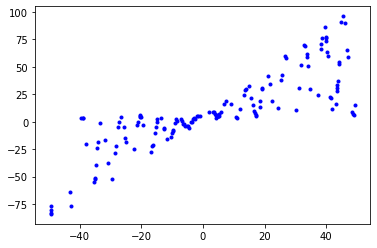

In [50]:
# Haining Tan Sep 19 (2021)

k,b,x_min,x_max,n = 1,5,-50,50,150

def aleatoric(x): # variablity function for a particular x
  r = (x - x_min) / (x_max - x_min)
  return 2 * r

def generate_data(n):
  x = (x_max - x_min) * np.random.rand(n) + x_min 
  noise = np.random.randn(n) * aleatoric(x)
  y = (k * x * (1 + np.sin(x)) + b) + noise   # add some non-linearity and noise
  x = x[..., np.newaxis] # convert to N * 1 matrix
  return x, y

x_train, y_train = generate_data(n)
x_test, y_test = generate_data(n)

plt.figure()
plt.plot(x_train, y_train, "b.")

In [51]:
# Haining Tan Sep 19 (2021)

# Kernel function

# "should be a tf.keras.Layer with an @property 
# that late-binds variable parameters to a 
# tfp.positive_semidefinite_kernel.PositiveSemidefiniteKernel instance"

class kernel_fn(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super(kernel_fn, self).__init__(**kwargs)
    dtype = kwargs.get('dtype', None)
    self._amplitude = self.add_variable(
        initializer=tf.constant_initializer(0), dtype=dtype, name="a"
    )
    self._length_scale = self.add_variable(
        initializer=tf.constant_initializer(0), dtype=dtype, name="scale"
    )
  def call(self, x): # will not be used
    return x

  @property
  def kernel(self):
    return tfp.math.psd_kernels.ExponentiatedQuadratic(
        amplitude=tf.nn.softplus(self._amplitude),
        length_scale=tf.nn.softplus(self._length_scale)
    )

In [54]:
# Haining Tan Sep 19 (2021)

# Variational GP
# There are a faw warnings, I am not familar with the up to date implementation...
# For stability tf.keras.backend.set_floatx('float64') ?

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=[1]),
  tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=False),
  tfp.layers.VariationalGaussianProcess(
      num_inducing_points=40,
      kernel_provider=kernel_fn(),
      event_shape=[1],
      inducing_index_points_initializer=tf.constant_initializer(
          np.linspace(-50, 50, num=40, dtype=x_train.dtype)[..., np.newaxis]
      ),
      unconstrained_observation_noise_variance_initializer=(
          tf.constant_initializer(np.array(0.54).astype(x_train.dtype))
      )
  )
])

/var/folders/69/4n0cxvc52gl8cvmf7qn06jr00000gn/T/ipykernel_89059/3543563449.py:13: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._amplitude = self.add_variable(
/var/folders/69/4n0cxvc52gl8cvmf7qn06jr00000gn/T/ipykernel_89059/3543563449.py:16: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._length_scale = self.add_variable(


---
# `kl_weight` for `VGP.variational_loss`

## Schwartz May 8 (2022)
---

As seen in the [`variational_loss` implementation](https://github.com/tensorflow/probability/blob/v0.16.0/tensorflow_probability/python/distributions/variational_gaussian_process.py#L1125-L1189) which depends on the [`surrogate_posterior_expected_log_likelihood` implementation](https://github.com/tensorflow/probability/blob/v0.16.0/tensorflow_probability/python/distributions/variational_gaussian_process.py#L951-L1105)


```
# reconstruction loss
recon = self.surrogate_posterior_expected_log_likelihood(observations=observations, ...)
kl_penalty = self.surrogate_posterior_kl_divergence_prior()
return -recon + kl_weight * kl_penalty
```

the expected log likelihood under the variational distribution
$E_{q_\phi(\theta)}[f_\theta(\mathbf{y}_{1:\text{batch_size}}|\mathbf{x}_{1:\text{batch_size}})]$ is computed for the entire batch, rather than as an expected value for a single observation. Thus, `kl_weight=batch_size/n` leads to the correct ratio between the reconstruction and the KL-divergence term:

$$\sum_{b=1}^B \left[ E_{q_\phi(\theta)}[f_\theta(\mathbf{y}_{(b-1)\times \text{batch_size}\;:\;b\times \text{batch_size}}|\mathbf{x}_{(b-1)\times \text{batch_size}\;:\;b\times \text{batch_size}})] + \frac{\text{batch_size}}{n} KL [\;q_\phi(\theta) \; || \; p\left(\theta | (\mathbf{x},\mathbf{y})_{(b-1)\times \text{batch_size}\;:\;b\times \text{batch_size}} \right)\;]\right]$$


In [55]:
# Haining Tan Sep 19 (2021) + comments Schwartz May 8 (2022)

# loss function for GP inference
def loss(y, f):
    return f.variational_loss(y, kl_weight=np.array(32, x_train.dtype)/x_train.shape[0])
                                 # `batch_size=32` is the default
                                 # `variational_loss` is expected reconstruction for entire batch,
                                 # not just a single observation as we have seen in previous examples
# train the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=loss)
model.fit(x_train, y_train, epochs=1000, verbose=False)

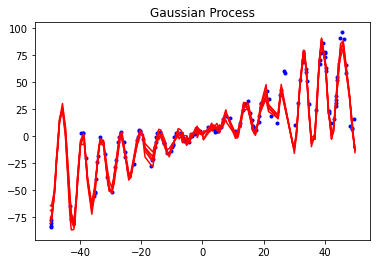

In [56]:
x_test = np.sort(x_test[:,0]).reshape(n,1)
gp = model(x_test)
plt.figure()
plt.plot(x_train, y_train, "b.")
for i in range(5):
  sample = gp.sample().numpy()
  f = sample[..., 0]
  plt.plot(x_test[..., 0], f, 'r')
plt.title("Gaussian Process")
plt.show()

---
# MCMC GP with PyMC3


## Haining Tan Feb 18 (2022) / re-use and commentary Schwartz May 8 (2022)
---

GP posterior analysis need not be VI based. Here, for some chosen priors, MCMC simulation of the posterior is used to creating a sampling based analysis of the posterior distribution of the GP (as opposed to VI approximation of this GP).

Please see the [PyMC3 introduction](https://docs.pymc.io/en/v3/pymc-examples/examples/getting_started.html) and the
[(GP) examples](https://docs.pymc.io/en/v3/nb_examples/index.html) to get started on GP analysis with PyMC3; and,  further PyMC GP documentation is available [here](https://docs.pymc.io/en/v3/Gaussian_Processes.html) and [here](https://docs.pymc.io/en/v3/api/gp.html).

In [73]:
import pymc3 as pm

X = x_train
y = y_train

with pm.Model() as gp_model:
  # Use a exponential quadratic kernel
  ita = pm.HalfNormal('ita', sigma=5)
  iota = pm.Gamma('iota', alpha=4, beta=2)

  sq_exp = ita ** 2 * pm.gp.cov.ExpQuad(input_dim=1, ls=iota)

  gp = pm.gp.Marginal(cov_func=sq_exp)

  sigma = pm.HalfNormal('sigma', sigma=5, testval=1)
  y_ = gp.marginal_likelihood('y', X=X, y=y, noise=sigma)

In [74]:
with gp_model:
  tr = pm.sample(target_accept=0.95, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, iota, ita]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 115 seconds.


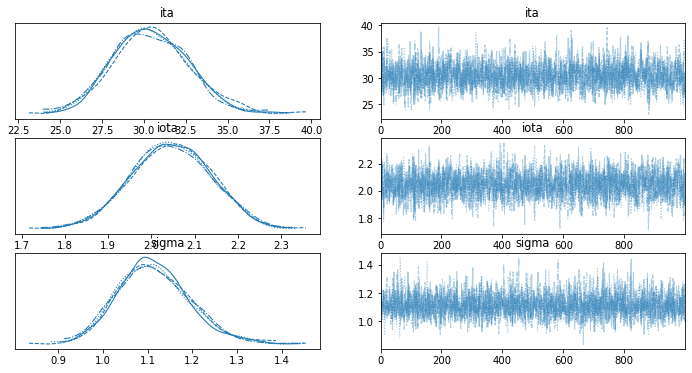

In [75]:
import arviz as az

az.plot_trace(tr, var_names=['ita', 'iota', 'sigma'])
plt.show()

In [76]:
Xnew = np.linspace(-50 , 50, 200)

with gp_model:
  pred = gp.conditional("pred", Xnew=Xnew[:, np.newaxis])

with gp_model:
  ppred = pm.sample_posterior_predictive(tr, samples=100, var_names=['pred'])

/Users/schwarls37/opt/miniconda3/envs/STA410/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


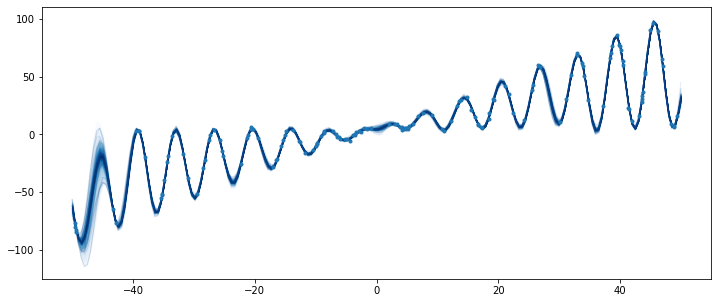

In [77]:
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
pm.gp.util.plot_gp_dist(ax, ppred['pred'], Xnew, plot_samples=True, palette='Blues')
ax.plot(X, y, '.')